In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

In [ ]:
# Parse XML file
tree = ET.parse('/content/Restaurants_Train_Final.xml')
root = tree.getroot()

In [ ]:
root[0][0]

<Element 'sentences' at 0x78d342558a40>

In [ ]:
# Initialize lists to store data
reviews_data = []

In [ ]:

# Process each review
for review in root.findall('Review'):
    rid = review.get('rid')
    sentences = review.find('sentences')

    if sentences is not None:
        for sentence in sentences.findall('sentence'):
            sentence_id = sentence.get('id')
            text = sentence.find('text').text.strip()

            opinions = sentence.find('Opinions')
            if opinions is not None:
                for opinion in opinions.findall('Opinion'):
                    target = opinion.get('target')
                    category = opinion.get('category')
                    polarity = opinion.get('polarity')

                    # Append data to list
                    reviews_data.append({
                        'Review_id': rid,
                        'Sentence_id': sentence_id,
                        'Text': text,
                        'Target': target,
                        'Category': category,
                        'Polarity': polarity
                    })

In [ ]:
# Convert to DataFrame
df_reviews = pd.DataFrame(reviews_data)

# Display the DataFrame for inspection
print("DataFrame showing extracted data:")
print(df_reviews)

DataFrame showing extracted data:
     Review_id Sentence_id                                               Text  \
0      1004293   1004293:0  Judging from previous posts this used to be a ...   
1      1004293   1004293:1  We, there were four of us, arrived at noon - t...   
2      1004293   1004293:2  They never brought us complimentary noodles, i...   
3      1004293   1004293:3  The food was lousy - too sweet or too salty an...   
4      1004293   1004293:3  The food was lousy - too sweet or too salty an...   
...        ...         ...                                                ...   
1649    958809    958809:1  I have to say I have never had a disapointing ...   
1650    958809    958809:2  We could have made a meal of the yummy dumplin...   
1651    958809    958809:3  Luckily we saved room for the BBQ Salmon, Sea ...   
1652    958809    958809:3  Luckily we saved room for the BBQ Salmon, Sea ...   
1653    958809    958809:3  Luckily we saved room for the BBQ Salmon, Sea .

In [ ]:
df_reviews.shape

(1654, 6)

In [ ]:
df_reviews.head()

,Review_id,Sentence_id,Text,Target,Category,Polarity
0,1004293,1004293:0,Judging from previous posts this used to be a ...,place,RESTAURANT#GENERAL,negative
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",staff,SERVICE#GENERAL,negative
2,1004293,1004293:2,"They never brought us complimentary noodles, i...",NULL,SERVICE#GENERAL,negative
3,1004293,1004293:3,The food was lousy - too sweet or too salty an...,food,FOOD#QUALITY,negative
4,1004293,1004293:3,The food was lousy - too sweet or too salty an...,portions,FOOD#STYLE_OPTIONS,negative


In [ ]:
df = df_reviews.drop('Review_id', axis=1)

In [ ]:
df

,Sentence_id,Text,Target,Category,Polarity
0,1004293:0,Judging from previous posts this used to be a ...,place,RESTAURANT#GENERAL,negative
1,1004293:1,"We, there were four of us, arrived at noon - t...",staff,SERVICE#GENERAL,negative
2,1004293:2,"They never brought us complimentary noodles, i...",NULL,SERVICE#GENERAL,negative
3,1004293:3,The food was lousy - too sweet or too salty an...,food,FOOD#QUALITY,negative
4,1004293:3,The food was lousy - too sweet or too salty an...,portions,FOOD#STYLE_OPTIONS,negative
...,...,...,...,...,...
1649,958809:1,I have to say I have never had a disapointing ...,meal,FOOD#QUALITY,positive
1650,958809:2,We could have made a meal of the yummy dumplin...,dumplings,FOOD#QUALITY,positive
1651,958809:3,"Luckily we saved room for the BBQ Salmon, Sea ...",BBQ Salmon,FOOD#QUALITY,positive
1652,958809:3,"Luckily we saved room for the BBQ Salmon, Sea ...",Sea Bass,FOOD#QUALITY,positive


In [ ]:
df.to_csv("preprocessed_restaurants_data.csv")

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_id    1654 non-null   object
 1   Sentence_id  1654 non-null   object
 2   Text         1654 non-null   object
 3   Target       1654 non-null   object
 4   Category     1654 non-null   object
 5   Polarity     1654 non-null   object
dtypes: object(6)
memory usage: 77.7+ KB


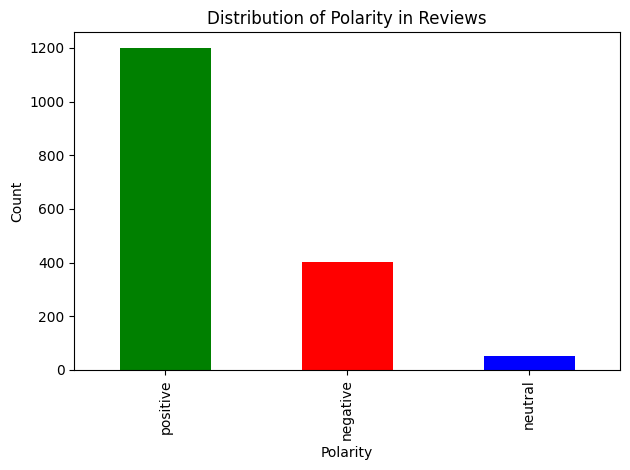

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each polarity
polarity_counts = df_reviews['Polarity'].value_counts()

# Plotting
fig, ax = plt.subplots()
polarity_counts.plot(kind='bar', ax=ax, color=['green', 'red', 'blue'])

# Add labels and title
ax.set_xlabel('Polarity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Polarity in Reviews')

# Display plot
plt.tight_layout()
plt.show()


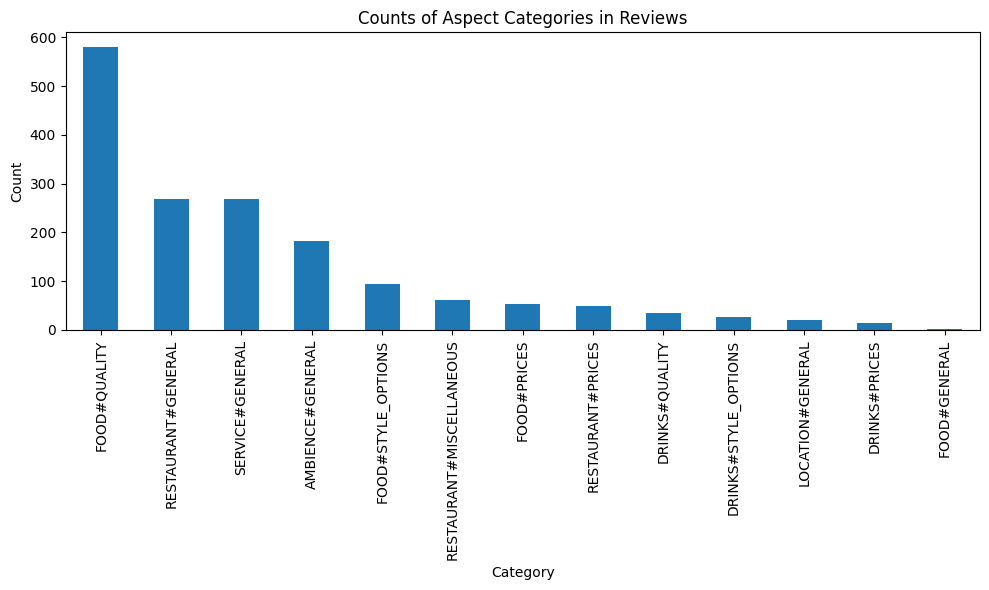

In [ ]:
# Count the occurrences of each category
category_counts = df_reviews['Category'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
category_counts.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Counts of Aspect Categories in Reviews')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display plot
plt.tight_layout()
plt.show()


In [ ]:
import xml.etree.ElementTree as ET
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
# Parse XML file
tree = ET.parse('Restaurants_Train_Final.xml')
root = tree.getroot()

In [ ]:
# Initialize set to store unique aspect categories
aspect_categories = set()

In [ ]:
# Function to perform ABSA on a given sentence element
def perform_absa(sentence_elem):
    sentence_id = sentence_elem.get('id')
    sentence_text = sentence_elem.find('text').text.strip()
    opinions = sentence_elem.find('Opinions')

    results = []

    if opinions is not None:
        for opinion in opinions.findall('Opinion'):
            target = opinion.get('target')
            category = opinion.get('category')
            polarity = opinion.get('polarity')

            # Extract aspect category (E#A)
            domain, aspect = category.split('#')
            aspect_categories.add(category)  # Add category to set of unique aspect categories

            # Determine sentiment polarity using NLTK Vader sentiment analyzer
            sentiment_scores = sid.polarity_scores(sentence_text)

            # Determine opinion target expression (OTE)
            ote = target if target != 'NULL' else None

            # Determine sentiment label based on compound score
            if sentiment_scores['compound'] >= 0.05:
                sentiment_label = 'positive'
            elif sentiment_scores['compound'] <= -0.05:
                sentiment_label = 'negative'
            else:
                sentiment_label = 'neutral'

            # Format the result
            result = {
                'aspect_category': category,
                'ote': ote if ote else 'NULL',
                'sentiment': sentiment_label,
                'sentence': sentence_text
            }

            results.append(result)

    return results

In [ ]:
# File to save results
output_file = 'absa_results.txt'

In [ ]:
# Open file for writing results
with open(output_file, 'w', encoding='utf-8') as f_out:
    # Iterate over each review in the XML
    for review in root.findall('Review'):
        review_id = review.get('rid')
        sentences = review.find('sentences')

        if sentences is not None:
            # Process each sentence in the review
            for sentence_elem in sentences.findall('sentence'):
                absa_results = perform_absa(sentence_elem)

                # Write results to file
                for result in absa_results:
                    f_out.write(f"Review id: {review_id}, Sentence id: {sentence_elem.get('id')}\n")
                    f_out.write(f"Aspect Category: {result['aspect_category']}, OTE: {result['ote']}, Sentiment: {result['sentiment']}\n")
                    f_out.write(f"Sentence: {result['sentence']}\n")
                    f_out.write("\n")

In [ ]:

# Print confirmation
print(f"Results saved to {output_file}")

Results saved to absa_results.txt


In [ ]:
print(absa_results)

[]


In [ ]:
f = open('absa_results.txt', 'r')

In [ ]:
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Function to parse XML file and extract data
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    X = []  # List to store review texts
    y = []  # List to store sentiment labels

    for review in root.findall('Review'):
        sentences = review.find('sentences')
        if sentences is not None:
            review_text = ' '.join([sentence.find('text').text.strip() for sentence in sentences.findall('sentence')])
            opinions = sentences.findall('.//Opinion')
            for opinion in opinions:
                target = opinion.get('target')
                category = opinion.get('category')
                polarity = opinion.get('polarity')

                X.append(review_text)
                y.append(polarity)

    return X, y

In [ ]:

# Parse XML data and extract features and labels
X, y = parse_xml('Restaurants_Train_Final.xml')

In [ ]:
X

['Judging from previous posts this used to be a good place, but not any longer. We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude. They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. The food was lousy - too sweet or too salty and the portions tiny. After all that, they complained to me about the small tip. Avoid this place!',
 'Judging from previous posts this used to be a good place, but not any longer. We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude. They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. The food was lousy - too sweet or too salty and the portions tiny. After all that, they complained to me about the small tip. Avoid this place!',
 'Judging from previous posts 

In [ ]:
y

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with TF-IDF vectorizer and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),  # Adjust max_features based on your dataset size
    ('svm', SVC(kernel='linear'))  # Linear SVM classifier
])


In [ ]:

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


In [ ]:


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

    negative       0.82      0.77      0.79        73
     neutral       0.00      0.00      0.00         7
    positive       0.92      0.96      0.94       251

    accuracy                           0.90       331
   macro avg       0.58      0.58      0.58       331
weighted avg       0.88      0.90      0.89       331



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Example of how to use the trained model for prediction
example_review = "The food was amazing but the service was terrible."
predicted_sentiment = pipeline.predict([example_review])
print(f'Predicted sentiment for example review: {predicted_sentiment[0]}')


Predicted sentiment for example review: positive


In [ ]:
import xml.etree.ElementTree as ET
import spacy

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Parse XML file and extract data
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    reviews_data = []

    for review in root.findall('Review'):
        review_id = review.get('rid')
        review_text = ''
        aspect_opinions = []

        sentences = review.find('.//sentences')
        if sentences is not None:
            review_text = ' '.join([sentence.find('text').text.strip() for sentence in sentences.findall('sentence')])

            for sentence in sentences.findall('sentence'):
                sentence_text = sentence.find('text').text.strip()
                opinions = sentence.find('Opinions')

                if opinions is not None:
                    for opinion in opinions.findall('Opinion'):
                        target = opinion.get('target')
                        category = opinion.get('category')
                        polarity = opinion.get('polarity')
                        from_offset = int(opinion.get('from'))
                        to_offset = int(opinion.get('to'))

                        aspect_opinions.append({
                            'review_id': review_id,
                            'target': target,
                            'category': category,
                            'polarity': polarity,
                            'ote': sentence_text[from_offset:to_offset] if from_offset != 0 else 'NULL',
                            'from_offset': from_offset,
                            'to_offset': to_offset
                        })

        reviews_data.append({
            'review_id': review_id,
            'review_text': review_text,
            'aspect_opinions': aspect_opinions
        })

    return reviews_data

# Function to process each review and perform ABSA
def perform_absa(reviews_data):
    aspect_sentiments = []

    for review_data in reviews_data:
        for aspect_opinion in review_data['aspect_opinions']:
            aspect_sentiments.append(aspect_opinion)

    return aspect_sentiments

# Example usage
xml_file = 'Restaurants_Train_Final.xml'
reviews_data = parse_xml(xml_file)
aspect_sentiments = perform_absa(reviews_data)



In [ ]:
aspect_sentiments

In [ ]:
# Example of printing aspect sentiments
for aspect in aspect_sentiments:
    print(f"Review ID: {aspect['review_id']}")
    print(f"Target: {aspect['target']}")
    print(f"Category: {aspect['category']}")
    print(f"Opinion Target Expression (OTE): {aspect['ote']}")
    print(f"Sentiment Polarity: {aspect['polarity']}")
    print()

# Save results to a file or further process as needed
# For saving to a file, you can modify the function to write to a text file


Streaming output truncated to the last 5000 lines.
Sentiment Polarity: negative

Review ID: 1632445
Target: seafood
Category: FOOD#QUALITY
Opinion Target Expression (OTE): seafood
Sentiment Polarity: positive

Review ID: 1632445
Target: NULL
Category: RESTAURANT#PRICES
Opinion Target Expression (OTE): NULL
Sentiment Polarity: negative

Review ID: 1632445
Target: lobster sandwich
Category: FOOD#QUALITY
Opinion Target Expression (OTE): lobster sandwich
Sentiment Polarity: positive

Review ID: 1632445
Target: lobster sandwich
Category: FOOD#PRICES
Opinion Target Expression (OTE): lobster sandwich
Sentiment Polarity: negative

Review ID: 1632929
Target: NULL
Category: RESTAURANT#GENERAL
Opinion Target Expression (OTE): NULL
Sentiment Polarity: positive

Review ID: 1632929
Target: food
Category: FOOD#QUALITY
Opinion Target Expression (OTE): food
Sentiment Polarity: positive

Review ID: 1632929
Target: halibut special
Category: FOOD#QUALITY
Opinion Target Expression (OTE): halibut special
Se